In [1]:
# Victor Z and David Cole
# UW-Madison, 2024
# Example Poisson RV

<ipython-input-2-16527b571903>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['', 'Mar', 'Feb', 'Jan', ''])


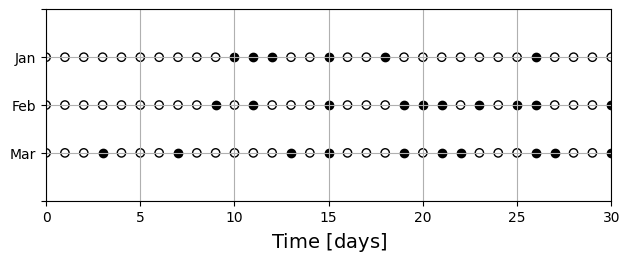

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# for reproducibility
np.random.seed(0)

# generate random failure sequences
z = 30  # days
lambda_ = 10  # average occurrences per z
t = np.arange(0, z+1)  # time vector
n = len(t)  # number of times
N = 3  # number of samples

plt.figure()

for k in range(1, N + 1):
    m = poisson.rvs(lambda_, size = k)  # number of occurrences

    y = np.zeros(n)
    y[0:(m[k - 1])] = 1
    np.random.shuffle(y)

    plt.subplot(2, 1, 1)
    for j in range(len(y)):
        if y[j] == 1:  # failure
            plt.scatter(t[j], k, color='black', facecolors='black', edgecolors='black')
        else:  # normal
            plt.scatter(t[j], k, color='black', facecolors='none', edgecolors='black')

plt.grid(True)
plt.gca().set_yticklabels(['', 'Mar', 'Feb', 'Jan', ''])
plt.axis([min(t), max(t), 0, 4])
plt.xlabel('$\mathrm{Time\ [days]}$', fontsize=14)
plt.box(True)

plt.tight_layout()
plt.show()

In [3]:
# compute pdf for poisson
lambdahat = np.mean([poisson.rvs(mu=lambda_) for _ in range(N)])

# compute probabilities
p0 = poisson.pmf(0, lambdahat)
print(f"Probability of 0 occurrences: {p0}")

p30 = poisson.pmf(30, lambdahat)
print(f"Probability of 30 occurrences: {p30}")

p11 = poisson.pmf(11, lambdahat)
print(f"Probability of 11 occurrences: {p11}")

Probability of 0 occurrences: 1.670170079024566e-05
Probability of 30 occurrences: 1.0987051972594115e-06
Probability of 11 occurrences: 0.11937806022802536
